In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import os

In [11]:
def load_quote_data(symbol, date):
    """
    Load a pickled DataFrame for the given symbol on the given date.
    
    - symbol: e.g. "XAU/USD"
    - date:   a Pandas Timestamp, datetime.date, or YYYY-MM-DD string
    
    File path structure assumed: Data/<symbol_no_slash>_<YYYY-MM-DD>.pkl
    Example: "Data/XAUUSD_2025-01-08.pkl"
    
    Returns:
        Pandas DataFrame if file exists, otherwise None.
    """
    # 1. Ensure date is a Timestamp
    if not isinstance(date, pd.Timestamp):
        date = pd.Timestamp(date)
    
    # 2. Convert symbol to a file-friendly format (remove slash)
    symbol_filename = symbol.replace('/', '')
    # 3. Build the date string
    date_str = date.strftime("%Y-%m-%d")
    # 4. Build the file path
    filepath = f"Data/{symbol_filename}_{date_str}.pkl"
    
    # 5. Load if it exists
    if os.path.exists(filepath):
        df = pd.read_pickle(filepath)
        return df
    else:
        print(f"File not found: {filepath}")
        return None


In [12]:


# # 1. Define your symbol list
# symbols = [
#     "AUD/CAD",
#     "AUD/JPY",
#     "AUD/USD",
#     "BTCUSD",
#     "CAD/JPY",
#     "ETHUSD",
#     "EUR/GBP",
#     "EUR/NZD",
#     "EUR/SEK",
#     "EUR/USD",
#     "EUR/ZAR",
#     "GBP/JPY",
#     "GBP/USD",
#     "NASUSD",
#     "NZD/USD",
#     "U30USD",
#     "USD/CAD",
#     "USD/CHF",
#     "USD/JPY",
#     "USOUSD",
#     "XAG/USD",
#     "XAU/USD",
#     "XNG/USD"
# ]

# # 2. Create a date range for all *business* days (weekdays) in January 2025
# #    (If you need *all* days including weekends, use freq="D" instead of "B".)
# date_range = pd.date_range(start="2025-01-01", end="2025-01-31", freq="B")

# # 3. For each date and symbol, call `get_quote_data`.
# #    Note: This assumes you have already defined the get_quote_data() function 
# #    in the same script or imported it from elsewhere.

# for current_date in date_range:
#     for symbol in symbols:
#         print(f"Fetching data for {symbol} on {current_date.date()} ...")
#         df = load_quote_data(current_date, symbol)
#         # df is also saved automatically (via the get_quote_data() function)
#         # to Data/<symbol>_<YYYY-MM-DD>.pkl
#         if df is not None:
#             print(f"  -> Returned {len(df)} rows.")
#         else:
#             print("  -> No data or error.")

In [13]:
date = "2025-01-07"
symbol = "XAU/USD"
df_loaded = load_quote_data(symbol, date)
if df_loaded is not None:
    print(f"Loaded DataFrame with {len(df_loaded)} rows.")

Loaded DataFrame with 15899252 rows.


In [14]:
df_loaded['MakerId'].unique()


array(['Britannia'], dtype=object)

In [15]:
df_loaded

,MakerId,CoreSymbol,TimeRecorded,TimeSent,TimeReceived,Depth,Side,Price,Size,Provider,IndicativeFlags,QuoteFlags,DisabledFlags,ForwardPriceDelta,id
0,Britannia,XAU/USD,2025-01-07 00:00:00.060123,2025-01-07 00:00:00.058756,2025-01-07 00:00:00.059490,0,0,2634.69,100.0,Britannia-AlpFinancial,0,0,0,None,6247000643
1,Britannia,XAU/USD,2025-01-07 00:00:00.060123,2025-01-07 00:00:00.058756,2025-01-07 00:00:00.059490,0,1,2634.74,100.0,Britannia-AlpFinancial,0,0,0,None,6247000644
2,Britannia,XAU/USD,2025-01-07 00:00:00.073325,2025-01-07 00:00:00.072220,2025-01-07 00:00:00.072973,0,0,2634.69,100.0,Britannia-AlpFinancial,0,0,0,None,6247000691
3,Britannia,XAU/USD,2025-01-07 00:00:00.073325,2025-01-07 00:00:00.072220,2025-01-07 00:00:00.072973,0,1,2634.74,100.0,Britannia-AlpFinancial,0,0,0,None,6247000692
4,Britannia,XAU/USD,2025-01-07 00:00:00.084562,2025-01-07 00:00:00.082992,2025-01-07 00:00:00.084219,0,0,2634.69,100.0,Britannia-AlpFinancial,0,524288,0,None,6247000803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15899247,Britannia,XAU/USD,2025-01-07 23:59:59.738246,2025-01-07 23:59:59.738286,2025-01-07 23:59:59.738108,2,1,2650.01,500.0,Britannia-AlpFinancial,0,524288,0,None,6327347928
15899248,Britannia,XAU/USD,2025-01-07 23:59:59.738246,2025-01-07 23:59:59.738286,2025-01-07 23:59:59.738108,3,1,2650.02,100.0,Britannia-AlpFinancial,0,524288,0,None,6327347929
15899249,Britannia,XAU/USD,2025-01-07 23:59:59.738246,2025-01-07 23:59:59.738286,2025-01-07 23:59:59.738108,4,1,2650.04,1000.0,Britannia-AlpFinancial,0,524288,0,None,6327347930
15899250,Britannia,XAU/USD,2025-01-07 23:59:59.738246,2025-01-07 23:59:59.738286,2025-01-07 23:59:59.738108,5,1,2650.05,300.0,Britannia-AlpFinancial,0,524288,0,None,6327347931


In [16]:
df_loaded = df_loaded[df_loaded['Depth'] == 0]
df = df_loaded[["CoreSymbol", "TimeRecorded", "Side", "Price", "Size"]]


In [17]:
df

,CoreSymbol,TimeRecorded,Side,Price,Size
0,XAU/USD,2025-01-07 00:00:00.060123,0,2634.69,100.0
1,XAU/USD,2025-01-07 00:00:00.060123,1,2634.74,100.0
2,XAU/USD,2025-01-07 00:00:00.073325,0,2634.69,100.0
3,XAU/USD,2025-01-07 00:00:00.073325,1,2634.74,100.0
4,XAU/USD,2025-01-07 00:00:00.084562,0,2634.69,100.0
...,...,...,...,...,...
15899217,XAU/USD,2025-01-07 23:59:58.417274,1,2649.99,100.0
15899224,XAU/USD,2025-01-07 23:59:58.427799,0,2649.73,100.0
15899231,XAU/USD,2025-01-07 23:59:58.427799,1,2649.99,100.0
15899238,XAU/USD,2025-01-07 23:59:59.738246,0,2649.73,100.0


In [18]:
sell_df = df[df["Side"] == 0].copy()
buy_df = df[df["Side"] == 1].copy()

# Rename columns to indicate Sell/Buy for clarity
sell_df = sell_df.rename(columns={"Price": "Sell_Price", "Size": "Sell_Size"})
buy_df = buy_df.rename(columns={"Price": "Buy_Price", "Size": "Buy_Size"})

# Select relevant columns for merging
sell_df = sell_df[["CoreSymbol", "TimeRecorded", "Sell_Price", "Sell_Size"]]
buy_df = buy_df[["CoreSymbol", "TimeRecorded", "Buy_Price", "Buy_Size"]]

# Merge Sell and Buy data on 'CoreSymbol' and 'TimeRecorded'
merged_df = pd.merge(sell_df, buy_df, on=["CoreSymbol", "TimeRecorded"], how="inner")

# Add a new column for the price difference
merged_df["Point_Diff"] = merged_df["Buy_Price"] - merged_df["Sell_Price"]

In [19]:
merged_df

,CoreSymbol,TimeRecorded,Sell_Price,Sell_Size,Buy_Price,Buy_Size,Point_Diff
0,XAU/USD,2025-01-07 00:00:00.060123,2634.69,100.0,2634.74,100.0,0.05
1,XAU/USD,2025-01-07 00:00:00.060123,2634.69,100.0,2634.74,100.0,0.05
2,XAU/USD,2025-01-07 00:00:00.073325,2634.69,100.0,2634.74,100.0,0.05
3,XAU/USD,2025-01-07 00:00:00.073325,2634.69,100.0,2634.74,100.0,0.05
4,XAU/USD,2025-01-07 00:00:00.084562,2634.69,100.0,2634.74,100.0,0.05
...,...,...,...,...,...,...,...
3974815,XAU/USD,2025-01-07 23:59:58.417274,2649.73,100.0,2649.99,100.0,0.26
3974816,XAU/USD,2025-01-07 23:59:58.427799,2649.73,100.0,2649.99,100.0,0.26
3974817,XAU/USD,2025-01-07 23:59:58.427799,2649.73,100.0,2649.99,100.0,0.26
3974818,XAU/USD,2025-01-07 23:59:59.738246,2649.73,100.0,2649.98,100.0,0.25


In [20]:
 # Time Series Plot with plotly, [my computer get's stuck]


# fig = px.line(
#     merged_df, 
#     x='TimeRecorded', 
#     y='Point_Diff', 
#     title='Point_Diff Over Time',
#     markers=True  # optional: to show markers on each point
# )

# # Show the interactive figure
# fig.show()

# # Time Series Plot with plotly with WebGL [my computer get's stuck]
# Example: using Scattergl for large data sets
# fig = go.Figure()
# fig.add_trace(
#     go.Scattergl(
#         x=merged_df["TimeRecorded"],
#         y=merged_df["Point_Diff"],
#         mode="markers",  # or "lines" or "lines+markers"
#         marker=dict(size=2, opacity=0.6)  # reduce marker size and maybe add some transparency
#     )
# )
# fig.update_layout(
#     title="Point_Diff Over Time (WebGL)",
#     xaxis_title="TimeRecorded",
#     yaxis_title="Point_Diff"
# )
# fig.show()

# #  # Time Series Plot with hvPlot and Datashader [JS Error]
# import hvplot.pandas  # pip install hvplot
# import holoviews as hv
# hv.extension('bokeh')  # or 'plotly' but typically 'bokeh' for Datashader

# # With hvPlot, you can create an interactive plot that uses datashader behind the scenes
# # by specifying 'datashade=True' or 'rasterize=True'.
# merged_df.hvplot.scatter(
#     x='TimeRecorded', 
#     y='Point_Diff', 
#     datashade=True,       # or rasterize=True
#     width=800, 
#     height=400,
#     title='Point_Diff Over Time (Datashader)'
# )

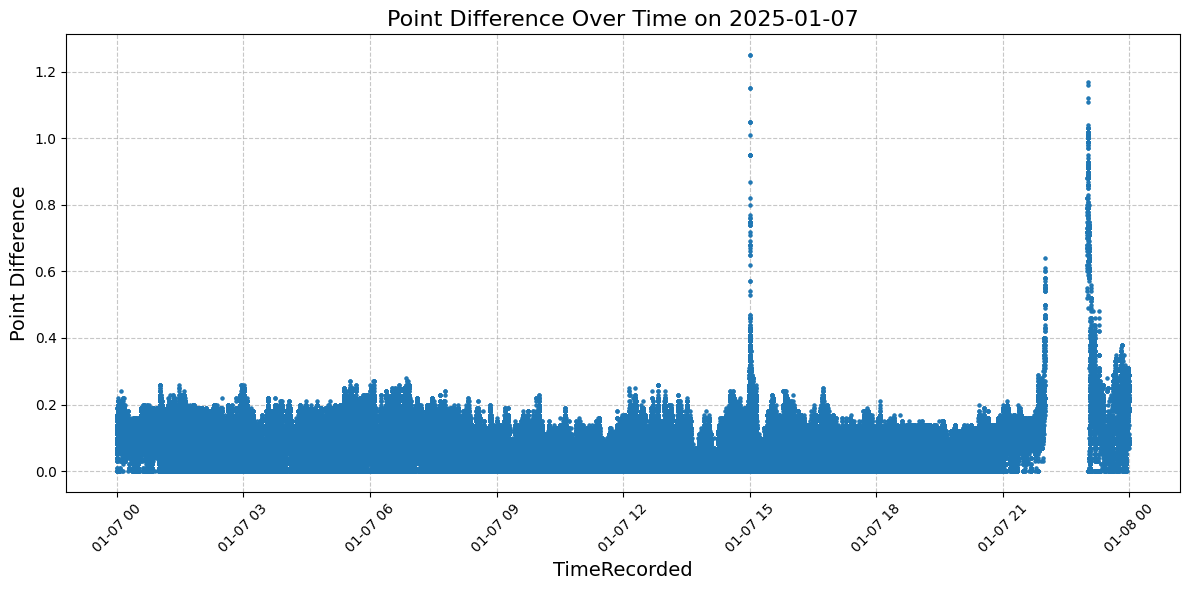

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(
    merged_df["TimeRecorded"], 
    merged_df["Point_Diff"], 
    marker="o",         # shape of the point (circle)
    linestyle="none",   # no connecting line
    markersize=2,       # size of the dots
    alpha=0.5
)
plt.title(f"Point Difference Over Time on {date}", fontsize=16)
plt.xlabel("TimeRecorded", fontsize=14)
plt.ylabel("Point Difference", fontsize=14)
plt.xticks(rotation=45)
plt.grid(linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

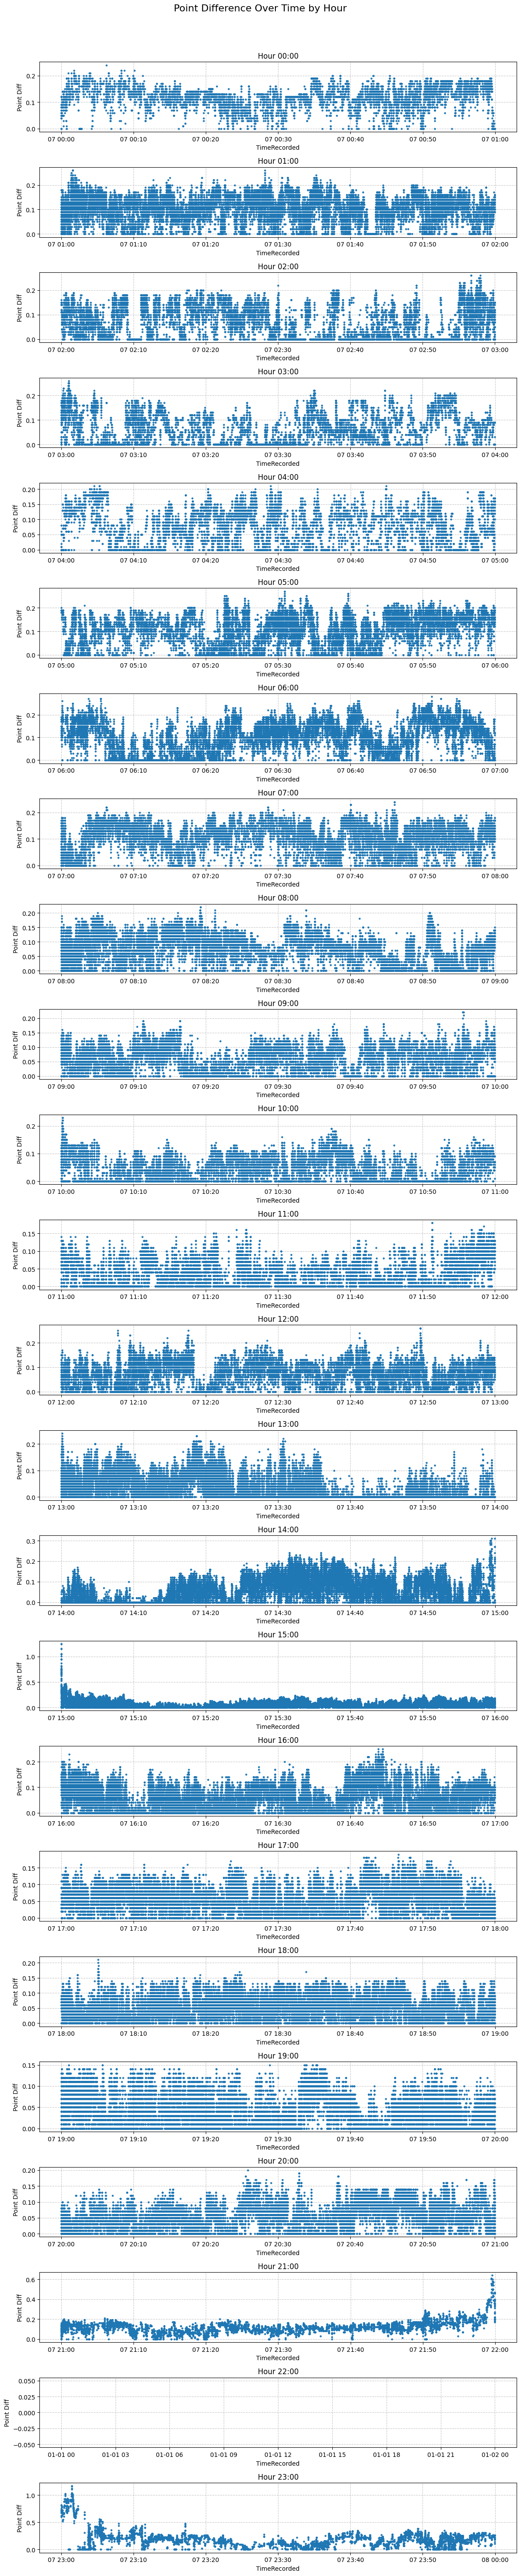

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Ensure TimeRecorded is datetime (if not already)
# merged_df['TimeRecorded'] = pd.to_datetime(merged_df['TimeRecorded'])

# 2) Extract the hour component
merged_df['Hour'] = merged_df['TimeRecorded'].dt.hour

# 3) Pre-calculate global y-limits so all subplots share them
y_min = merged_df["Point_Diff"].min()
y_max = merged_df["Point_Diff"].max()

# 4) Create a figure with 24 subplots (one per hour)
fig, axes = plt.subplots(nrows=24, ncols=1, figsize=(12, 60), sharex=False, sharey=False)
fig.suptitle("Point Difference Over Time by Hour", fontsize=16)

for hour in range(24):
    ax = axes[hour]
    # Subset data for this specific hour
    hour_df = merged_df[merged_df['Hour'] == hour]

    # Plot dots only (no line)
    ax.plot(
        hour_df["TimeRecorded"], 
        hour_df["Point_Diff"], 
        marker="o", 
        linestyle="none",   # <-- This makes it only dots
        markersize=2, 
        alpha=0.5
    )
    
    # Keep the same y-limits across all subplots
    # ax.set_ylim([y_min, y_max])
    
    # Labeling
    ax.set_title(f"Hour {hour:02d}:00", fontsize=12)
    ax.set_xlabel("TimeRecorded", fontsize=10)
    ax.set_ylabel("Point Diff", fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # leaves space at the top for suptitle
plt.show()

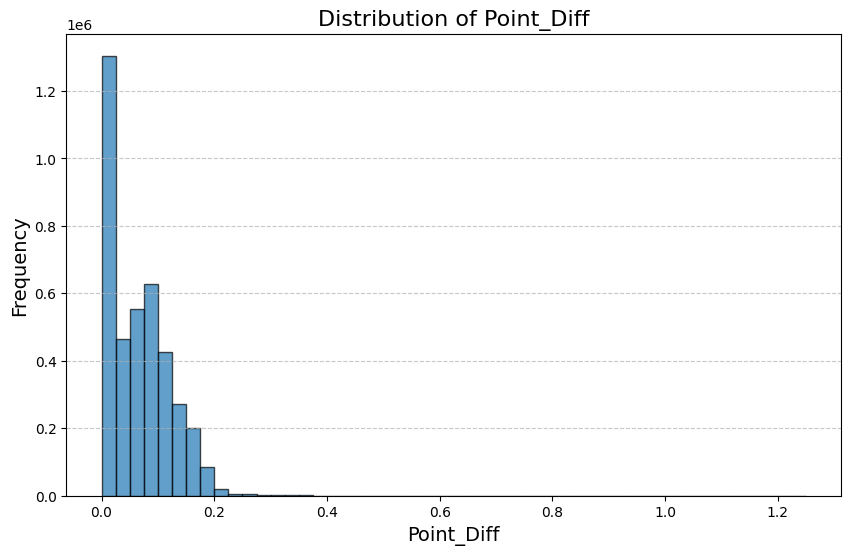

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(merged_df["Point_Diff"], bins=50, edgecolor="k", alpha=0.7)
plt.title("Distribution of Point_Diff", fontsize=16)
plt.xlabel("Point_Diff", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


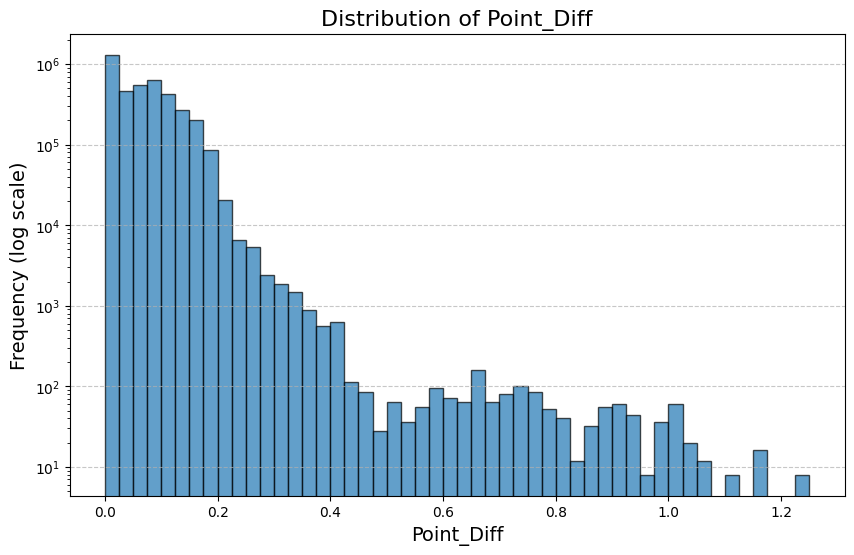

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(
    merged_df["Point_Diff"], 
    bins=50, 
    edgecolor="k", 
    alpha=0.7, 
    log=True  # <-- This enables log scale on the y-axis
)
plt.title("Distribution of Point_Diff", fontsize=16)
plt.xlabel("Point_Diff", fontsize=14)
plt.ylabel("Frequency (log scale)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

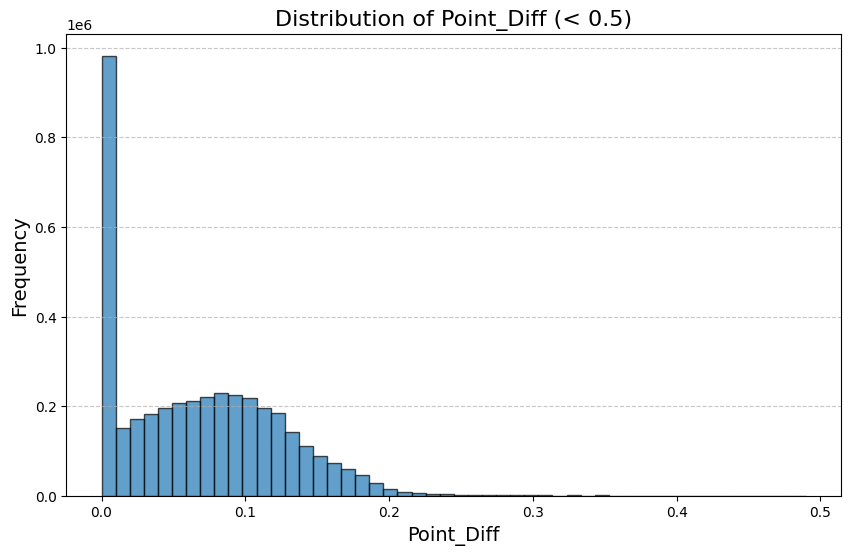

In [25]:


# Filter your data
filtered_df = merged_df[merged_df["Point_Diff"] < 0.5]

# Plot the distribution of `Point_Diff` under 0.5
plt.figure(figsize=(10, 6))
plt.hist(filtered_df["Point_Diff"], bins=50, edgecolor="k", alpha=0.7)
plt.title("Distribution of Point_Diff (< 0.5)", fontsize=16)
plt.xlabel("Point_Diff", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

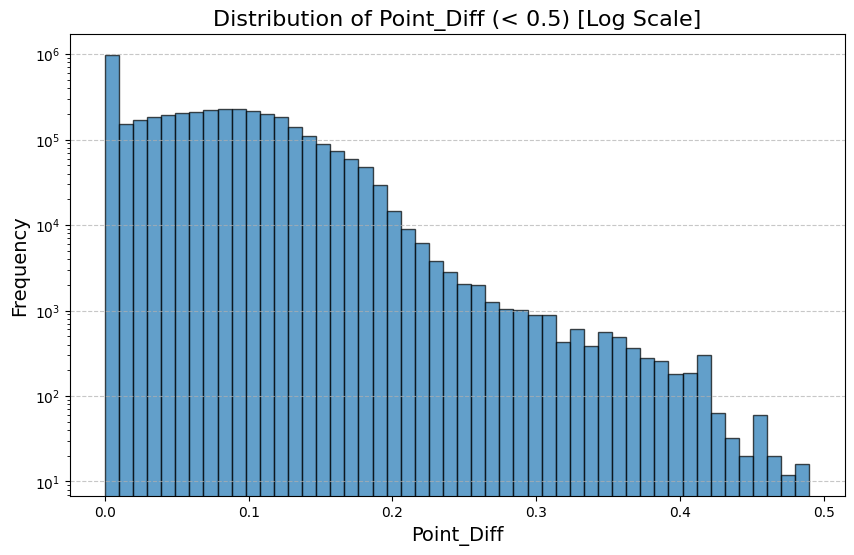

In [26]:
# Filter your data
filtered_df = merged_df[merged_df["Point_Diff"] < 0.5]

# Plot the distribution of `Point_Diff` under 0.5 (log scale on y-axis)
plt.figure(figsize=(10, 6))
plt.hist(
    filtered_df["Point_Diff"], 
    bins=50, 
    edgecolor="k", 
    alpha=0.7, 
    log=True  # <-- This makes the y-axis logarithmic
)
plt.title("Distribution of Point_Diff (< 0.5) [Log Scale]", fontsize=16)
plt.xlabel("Point_Diff", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

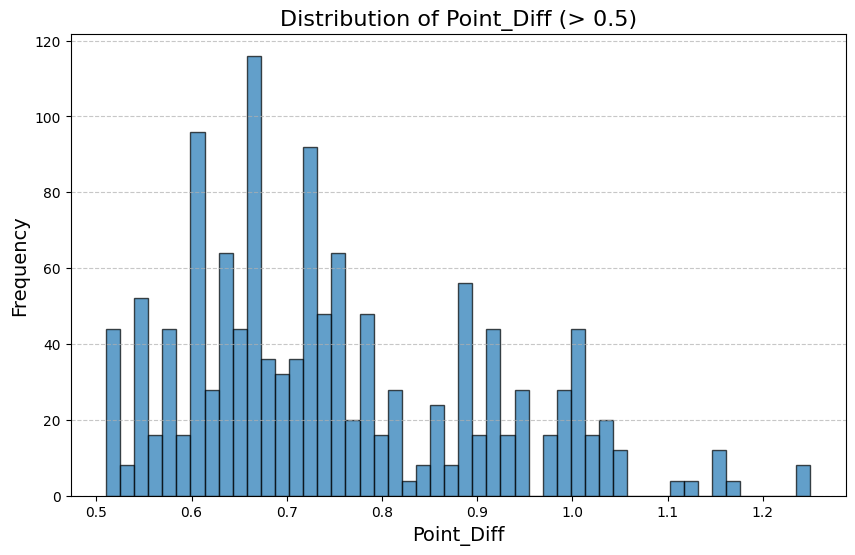

In [27]:
filtered_df = merged_df[merged_df["Point_Diff"] > 0.5]

# Plot the distribution of Point_Diff (> 0.5)
plt.figure(figsize=(10, 6))
plt.hist(
    filtered_df["Point_Diff"], 
    bins=50, 
    edgecolor="k", 
    alpha=0.7
)
plt.title("Distribution of Point_Diff (> 0.5)", fontsize=16)
plt.xlabel("Point_Diff", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [28]:

# 1. Quick overview (count, mean, std, min, quartiles, max, etc.)
print("=== Describe (default percentiles) ===")
print(merged_df['Point_Diff'].describe())

# 2. Custom percentiles (e.g., 5th, 25th, 50th, 75th, 95th)
print("\n=== Describe (custom percentiles) ===")
print(merged_df['Point_Diff'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]))

# 3. Specific summary statistics
mean_val = merged_df['Point_Diff'].mean()
median_val = merged_df['Point_Diff'].median()
std_val = merged_df['Point_Diff'].std()
var_val = merged_df['Point_Diff'].var()
min_val = merged_df['Point_Diff'].min()
max_val = merged_df['Point_Diff'].max()
skew_val = merged_df['Point_Diff'].skew()
kurt_val = merged_df['Point_Diff'].kurt()

print("\n=== Specific Statistics ===")
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Standard Deviation: {std_val}")
print(f"Variance: {var_val}")
print(f"Min: {min_val}")
print(f"Max: {max_val}")
print(f"Skewness: {skew_val}")
print(f"Kurtosis: {kurt_val}")

# # 4. If you need specific percentiles programmatically, you can also use numpy:
# perc_10, perc_90 = np.percentile(merged_df['Point_Diff'], [10, 90])
# print("\n=== Additional Percentiles ===")
# print(f"10th Percentile: {perc_10}")
# print(f"90th Percentile: {perc_90}")

=== Describe (default percentiles) ===
count    3.974816e+06
mean     6.456393e-02
std      5.777482e-02
min      0.000000e+00
25%      1.000000e-02
50%      6.000000e-02
75%      1.000000e-01
max      1.250000e+00
Name: Point_Diff, dtype: float64

=== Describe (custom percentiles) ===
count    3.974816e+06
mean     6.456393e-02
std      5.777482e-02
min      0.000000e+00
5%       0.000000e+00
25%      1.000000e-02
50%      6.000000e-02
75%      1.000000e-01
95%      1.600000e-01
max      1.250000e+00
Name: Point_Diff, dtype: float64

=== Specific Statistics ===
Mean: 0.06456393453181293
Median: 0.05999999999994543
Standard Deviation: 0.057774822253749684
Variance: 0.0033379300864523694
Min: 0.0
Max: 1.25
Skewness: 1.2758932035175046
Kurtosis: 9.01383826048291


Lower Bound: -0.12500000000113687
Upper Bound: 0.2350000000012642
Number of Outliers: 17480


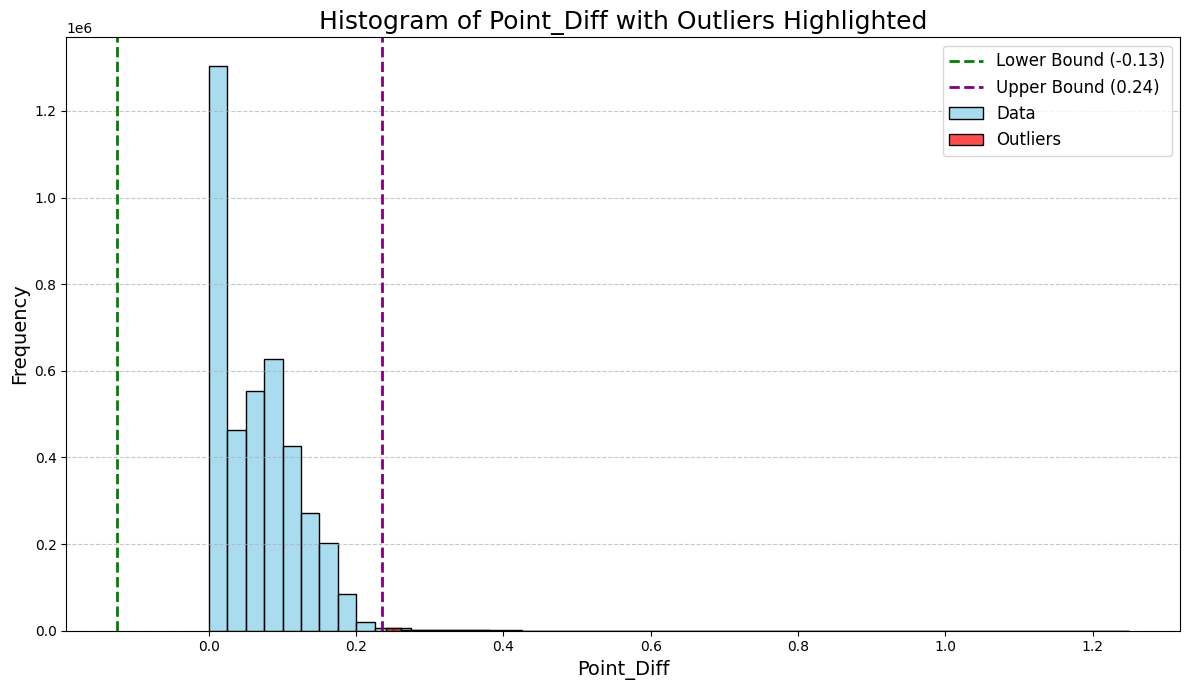

In [29]:

# 1. Calculate Q1, Q3, and IQR
Q1 = merged_df["Point_Diff"].quantile(0.25)
Q3 = merged_df["Point_Diff"].quantile(0.75)
IQR = Q3 - Q1

# 2. Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# 3. Identify outliers
outliers = merged_df[(merged_df["Point_Diff"] < lower_bound) | (merged_df["Point_Diff"] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")

# 4. Plotting
plt.figure(figsize=(12, 7))

# Plot histogram for all data
sns.histplot(
    merged_df["Point_Diff"], 
    bins=50, 
    color='skyblue', 
    edgecolor='black', 
    label='Data', 
    alpha=0.7
)

# Overlay histogram for outliers
if not outliers.empty:
    sns.histplot(
        outliers["Point_Diff"], 
        bins=50, 
        color='red', 
        edgecolor='black', 
        label='Outliers', 
        alpha=0.7
    )

# Plot vertical lines for bounds
plt.axvline(lower_bound, color='green', linestyle='--', linewidth=2, label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(upper_bound, color='purple', linestyle='--', linewidth=2, label=f'Upper Bound ({upper_bound:.2f})')

# Title and labels
plt.title("Histogram of Point_Diff with Outliers Highlighted", fontsize=18)
plt.xlabel("Point_Diff", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Legend
plt.legend(fontsize=12)

# Grid
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()